In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ('Place', 'Div_Over_Total','Number', 'Name', 'Age', 'Hometown', 'Gun_Time', 'Net_Time', 'Pace')

In [3]:
df_females = pd.read_csv('/Users/jzegler/Desktop/MA Exercise_20180328-2/MA_Exer_PikesPeak_Females.txt', delimiter = "\t", encoding='latin-1', names=col_names).drop(0).reset_index(drop=True)
df_males = pd.read_csv('/Users/jzegler/Desktop/MA Exercise_20180328-2/MA_Exer_PikesPeak_Males.txt', delimiter = "\t", encoding='latin-1', names=col_names).drop(0).reset_index(drop=True)

In [4]:
df_females['Gender'] = 'Female'
df_males['Gender'] = 'Male'
master_df = pd.concat([df_males, df_females])

In [5]:
def get_gun_time(x):
    split = x.split(' ')
    gun_time = split[-1]
    return gun_time

def get_character_in_gun_time(x):
    split = x.split(' ')
    if len(split) != 1:
        character  = split[0]
        return character
    return ''

correct_gun_time = master_df['Gun_Time'].apply(get_gun_time)
correct_hometown = master_df['Hometown'] + master_df['Gun_Time'].apply(get_character_in_gun_time)

master_df['Gun_Time'] = correct_gun_time
master_df['Hometown'] = correct_hometown

In [6]:
# in_format = df_females['Gun_Time'].apply(lambda x: 
#                                          bool(re.match("[0-9]:[0-5][0-9]:[0-5][0-9]", x)) or
#                                          bool(re.match("[0-9][0-9]:[0-5][0-9]", x)))

# df_females[~ in_format]

In [8]:
df_females.head()

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender
0,1,1/86,30,Florence Jepkosgei,22,Kenya .,32:59,32:58#,5:19,Female
1,2,2/86,8,Eunice Chepkirui,21,Kenya .,33:14,33:13#,5:21,Female
2,3,1/247,3200,Elena Orlova,36,Gaithersburg MD,34:26,34:25#,5:33,Female
3,4,1/173,2,Susannah Kvasnicka,34,Great Falls VA,34:43,34:42#,5:35,Female
4,5,1/142,6,Casey Smith,26,Arlington VA,35:04,35:02,5:39,Female


In [9]:
master_df['Net_Time'] = master_df['Net_Time'].str.replace('#', '')
master_df['Net_Time'] = master_df['Net_Time'].str.replace('*', '')
master_df['Hometown'] = master_df['Hometown'].str.replace('.', '')
#df_females['Gun_Time'] = df_females['Gun_Time'].str.replace('D','') 
#Couldn't figure out how to separate Gun_Time by whitespace into two columns & concat the 'D' to the end of 'Hometown'

In [10]:
master_df.tail()

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender
1100,1101,247/247,1847,Alicia Maxwell,35,Germantown MD,1:43:47,1:40:39,16:12,Female
1101,1102,110/110,2618,Regina Tenali,47,Gaithersburg MD,1:50:31,1:45:22,16:58,Female
1102,1103,171/173,986,Nirmala Donley,32,Ellicott City MD,1:50:31,1:45:22,16:58,Female
1103,1104,172/173,1214,Heidi Gertner,34,Bethesda MD,1:46:49,1:46:49,17:12,Female
1104,1105,173/173,2852,Deborah Zerwitz,33,Washington DC,1:46:49,1:46:49,17:12,Female


In [11]:
print(type(master_df['Net_Time'].iloc[1]))

<class 'str'>


In [12]:
def add_hours(x):
    if type(x) == str:
        split = x.split(':')
        if len(split) == 2:
            return '0:' + x
        else: return x

master_df['Net_Time'] = master_df['Net_Time'].apply(add_hours)

In [16]:
net_time = pd.to_datetime(master_df['Net_Time'], infer_datetime_format=True)
master_df['Net_Time_Float'] = (net_time.dt.hour *60) + (net_time.dt.minute) + (net_time.dt.second /60.).round(2)
master_df.head(50)

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender,Net_Time_Float
0,1,1/48,9,Joshua Kemei,22,Kenya,28:48,0:28:47,4:38,Male,28.78
1,2,2/48,35,George Kirwa Misoi,22,Kenya,29:11,0:29:10,4:42,Male,29.17
2,3,3/48,3,Jacob Frey,24,Oakton VA,29:38,0:29:37,4:46,Male,29.62
3,4,1/96,49,Gurmessa Kumsa,27,Oxon Hill MD,29:46,0:29:46,4:48,Male,29.77
4,5,4/48,31,Mike Baird,24,Ardmore PA,30:31,0:30:30,4:55,Male,30.50
5,6,5/48,1662,Jon Lauder,23,Oakton VA,31:14,0:31:13,5:02,Male,31.22
6,7,1/143,11,Paul Rades,33,Wheaton MD,31:40,0:31:38,5:06,Male,31.63
7,8,6/48,48,Haile Gelalcha,20,Oxon Hill MD,31:39,0:31:39,5:06,Male,31.65
8,9,2/96,33,John Bitok,26,Kenya,31:55,0:31:55,5:09,Male,31.92
9,10,1/45,50,Dema Woyessa,19,Oxon Hill MD,32:30,0:32:30,5:14,Male,32.50


In [15]:
max_female = master_df[master_df['Gender'] == 'Female'].max(numeric_only='Net_Time_Float')

In [106]:
min_female = master_df[master_df['Gender'] == 'Female'].min(numeric_only='Net_Time_Float')

In [107]:
range_female = max_female - min_female
range_female

Net_Time_Float    73.85
dtype: float64

In [108]:
max_male = master_df[master_df['Gender'] == 'Male'].max(numeric_only='Net_Time_Float')

In [109]:
min_male = master_df[master_df['Gender'] == 'Male'].min(numeric_only='Net_Time_Float')

In [110]:
range_male = max_male - min_male
range_male

Net_Time_Float    71.85
dtype: float64

In [111]:
master_df['Net_Time_Float'].min()

28.78

In [112]:
mean_female = master_df[master_df['Gender'] == 'Female'].mean(numeric_only='Net_Time_Float')
mean_female

Net_Time_Float    58.474778
dtype: float64

In [113]:
mean_male = master_df[master_df['Gender'] == 'Male'].mean(numeric_only='Net_Time_Float')
mean_male

Net_Time_Float    52.132561
dtype: float64

In [114]:
median_female = master_df[master_df['Gender'] == 'Female'].median(numeric_only='Net_Time_Float')
median_female

Net_Time_Float    57.85
dtype: float64

In [115]:
median_male = master_df[master_df['Gender'] == 'Male'].median(numeric_only='Net_Time_Float')
median_male

Net_Time_Float    51.38
dtype: float64

In [116]:
mode_female = master_df[master_df['Gender'] == 'Female'].mode(numeric_only=True)
mode_female

,Net_Time_Float
0,48.10
1,51.58
2,52.98
3,53.48
4,59.00


In [117]:
mode_male = master_df[master_df['Gender'] == 'Male'].mode(numeric_only=True)
mode_male

,Net_Time_Float
0,35.47
1,47.08
2,47.38
3,49.80
4,49.97
5,51.33
6,52.10
7,52.70
8,54.40
9,56.72


QUESTION 1

In [118]:
Q1_df = pd.DataFrame(np.array([[58.474736, 57.85, 48.100000], [52.132516, 51.383333, 35.466667]]), 
                     columns=['Mean', 'Median', 'Mode'], index=['Female','Male']).round(2)
Q1_df

,Mean,Median,Mode
Female,58.47,57.85,48.10
Male,52.13,51.38,35.47


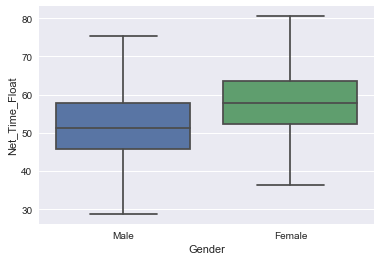

In [119]:
sns.set_style(style='darkgrid')
master_boxplot = sns.boxplot(data=master_df, x='Gender', y='Net_Time_Float', showfliers=False)

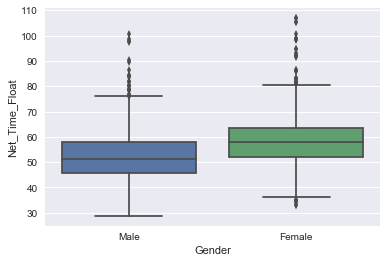

In [186]:
sns.set_style(style='darkgrid')
master_boxplot2 = sns.boxplot(data=master_df, x='Gender', y='Net_Time_Float', showfliers=True)

In [126]:
master_df['Gun_Time'] = master_df['Gun_Time'].apply(add_hours)
gun_time = pd.to_datetime(master_df['Gun_Time'], infer_datetime_format=True)
master_df['Gun_Time_Float'] = (gun_time.dt.hour *60) + (gun_time.dt.minute) + (gun_time.dt.second /60.).round(2)
master_df.head(50)

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender,Net_Time_Float,Gun_Time_Float,GunNet_Diff
0,1,1/48,9,Joshua Kemei,22,Kenya,0:28:48,0:28:47,4:38,Male,28.78,28.80,0.02
1,2,2/48,35,George Kirwa Misoi,22,Kenya,0:29:11,0:29:10,4:42,Male,29.17,29.18,0.01
2,3,3/48,3,Jacob Frey,24,Oakton VA,0:29:38,0:29:37,4:46,Male,29.62,29.63,0.01
3,4,1/96,49,Gurmessa Kumsa,27,Oxon Hill MD,0:29:46,0:29:46,4:48,Male,29.77,29.77,0.00
4,5,4/48,31,Mike Baird,24,Ardmore PA,0:30:31,0:30:30,4:55,Male,30.50,30.52,0.02
5,6,5/48,1662,Jon Lauder,23,Oakton VA,0:31:14,0:31:13,5:02,Male,31.22,31.23,0.01
6,7,1/143,11,Paul Rades,33,Wheaton MD,0:31:40,0:31:38,5:06,Male,31.63,31.67,0.04
7,8,6/48,48,Haile Gelalcha,20,Oxon Hill MD,0:31:39,0:31:39,5:06,Male,31.65,31.65,0.00
8,9,2/96,33,John Bitok,26,Kenya,0:31:55,0:31:55,5:09,Male,31.92,31.92,0.00
9,10,1/45,50,Dema Woyessa,19,Oxon Hill MD,0:32:30,0:32:30,5:14,Male,32.50,32.50,0.00


In [121]:
master_df['GunNet_Diff']= master_df['Gun_Time_Float'] - master_df['Net_Time_Float']

In [128]:
master_df.tail(100)

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender,Net_Time_Float,Gun_Time_Float,GunNet_Diff
1005,1006,224/247,1972,Andrea Moss,37,Laurel MD,1:16:30,1:11:15,11:28,Female,71.25,76.50,5.25
1006,1007,163/173,2264,Gloria Reyes,44,Rockville MD,1:16:31,1:11:16,11:29,Female,71.27,76.52,5.25
1007,1008,130/142,1777,Caroline Mackey,25,Bethesda MD,1:16:35,1:11:18,11:29,Female,71.30,76.58,5.28
1008,1009,15/15,1778,Susan Mackey,-1,North Potomac MD,1:16:36,1:11:18,11:29,Female,71.30,76.60,5.30
1009,1010,225/247,1388,Gail Hollenbeck,39,Centreville VA,1:14:38,1:11:18,11:29,Female,71.30,74.63,3.33
1010,1011,226/247,777,Renee Chen,36,Silver Spring MD,1:16:32,1:11:19,11:29,Female,71.32,76.53,5.21
1011,1012,102/110,1678,Jeong Hee Lee,47,Columbia MD,1:14:44,1:11:37,11:32,Female,71.62,74.73,3.11
1012,1013,164/173,1622,Laura Kresse,43,Rockville MD,1:17:08,1:11:48,11:34,Female,71.80,77.13,5.33
1013,1014,227/247,2474,Heather Slater,36,Rockville MD,1:17:06,1:11:49,11:34,Female,71.82,77.10,5.28
1014,1015,228/247,2707,Kelly Wakefield,37,Purcellville VA,1:13:10,1:11:57,11:35,Female,71.95,73.17,1.22


In [123]:
# plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
# Q2_viz = plt.hist(master_df.GunNet_Diff, bins=15)

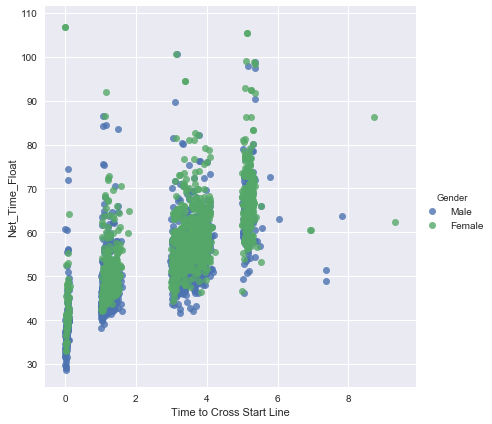

In [124]:
#plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
#plt.scatter(y = master_df.Net_Time_Float, x=master_df.GunNet_Diff)
Q2_vis1 = sns.lmplot(data=master_df, x='GunNet_Diff', y='Net_Time_Float',\
                 fit_reg=False, hue='Gender', size=6, aspect=1)

Q2_vis1.set_xlabels(label='Time to Cross Start Line')

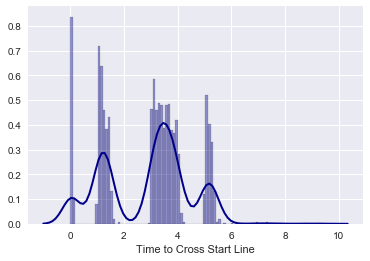

In [125]:
sns.distplot(master_df.GunNet_Diff, hist=True, kde=True,
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, axlabel='Time to Cross Start Line')

In [127]:
master_df.head()

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender,Net_Time_Float,Gun_Time_Float,GunNet_Diff
0,1,1/48,9,Joshua Kemei,22,Kenya,0:28:48,0:28:47,4:38,Male,28.78,28.80,0.02
1,2,2/48,35,George Kirwa Misoi,22,Kenya,0:29:11,0:29:10,4:42,Male,29.17,29.18,0.01
2,3,3/48,3,Jacob Frey,24,Oakton VA,0:29:38,0:29:37,4:46,Male,29.62,29.63,0.01
3,4,1/96,49,Gurmessa Kumsa,27,Oxon Hill MD,0:29:46,0:29:46,4:48,Male,29.77,29.77,0.00
4,5,4/48,31,Mike Baird,24,Ardmore PA,0:30:31,0:30:30,4:55,Male,30.50,30.52,0.02


In [142]:
master_df = master_df.dropna(subset=['Age']) #a few NaN values preventing Age calcs, so decided to drop

In [143]:
print(master_df[master_df['Age'].isnull()])

Empty DataFrame
Columns: [Place, Div_Over_Total, Number, Name, Age, Hometown, Gun_Time, Net_Time, Pace, Gender, Net_Time_Float, Gun_Time_Float, GunNet_Diff]
Index: []


In [147]:
master_df['Age'] = master_df['Age'].astype(int) 

In [333]:
def get_age_group(Age):
    if Age >=0 and Age<=14:
        return '0-14'
    elif Age >=15 and Age<=19:
        return '15-19'
    elif Age >=20 and Age<=29:
        return '20-29'
    elif Age >=30 and Age<=39:
        return '30-39'
    elif Age >=40 and Age<=49:
        return '40-49'
    elif Age >= 50 and Age<=59:
        return '50-59'
    elif Age >= 60:
        return '60+'


master_df['Age_Group'] = master_df['Age'].apply(get_age_group)

In [337]:
def get_division(row):
    Gender = row.Gender
    Age_Group = row.Age_Group
    if Gender == 'Male' and Age_Group == '0-14':
        return '1'
    elif Gender == 'Male' and Age_Group == '15-19':
        return '2'
    elif Gender == 'Male' and Age_Group == '20-29':
        return '3'
    elif Gender == 'Male' and Age_Group == '30-39':
        return '4'
    elif Gender == 'Male' and Age_Group == '40-49':
        return '5'
    elif Gender == 'Male' and Age_Group == '50-59':
        return '6'
    elif Gender == 'Male' and Age_Group == '60+':
        return '7'
    elif Gender == 'Female' and Age_Group == '0-14':
        return '8'
    elif Gender == 'Female' and Age_Group == '15-19':
        return '9'
    elif Gender == 'Female' and Age_Group == '20-29':
        return '10'
    elif Gender == 'Female' and Age_Group == '30-39':
        return '11'
    elif Gender == 'Female' and Age_Group == '40-49':
        return '12'
    elif Gender == 'Female' and Age_Group == '50-59':
        return '13'
    elif Gender == 'Female' and Age_Group == '60+':
        return '14'
        
master_df['Division'] = master_df.apply(get_division, axis=1)

In [340]:
master_df.head(100)

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender,Net_Time_Float,Gun_Time_Float,GunNet_Diff,Age_Group,Division
0,1,1/48,9,Joshua Kemei,22,Kenya,0:28:48,0:28:47,4:38,Male,28.78,28.80,0.02,20-29,3
1,2,2/48,35,George Kirwa Misoi,22,Kenya,0:29:11,0:29:10,4:42,Male,29.17,29.18,0.01,20-29,3
2,3,3/48,3,Jacob Frey,24,Oakton VA,0:29:38,0:29:37,4:46,Male,29.62,29.63,0.01,20-29,3
3,4,1/96,49,Gurmessa Kumsa,27,Oxon Hill MD,0:29:46,0:29:46,4:48,Male,29.77,29.77,0.00,20-29,3
4,5,4/48,31,Mike Baird,24,Ardmore PA,0:30:31,0:30:30,4:55,Male,30.50,30.52,0.02,20-29,3
5,6,5/48,1662,Jon Lauder,23,Oakton VA,0:31:14,0:31:13,5:02,Male,31.22,31.23,0.01,20-29,3
6,7,1/143,11,Paul Rades,33,Wheaton MD,0:31:40,0:31:38,5:06,Male,31.63,31.67,0.04,30-39,4
7,8,6/48,48,Haile Gelalcha,20,Oxon Hill MD,0:31:39,0:31:39,5:06,Male,31.65,31.65,0.00,20-29,3
8,9,2/96,33,John Bitok,26,Kenya,0:31:55,0:31:55,5:09,Male,31.92,31.92,0.00,20-29,3
9,10,1/45,50,Dema Woyessa,19,Oxon Hill MD,0:32:30,0:32:30,5:14,Male,32.50,32.50,0.00,15-19,2


In [341]:
#Q3 - How much time separates Chris Doe fromthe top 10 percentile of racers of the samedivision?

In [342]:
master_df[master_df['Name'] == 'Chris Doe'] #Chris Doe stats

,Place,Div_Over_Total,Number,Name,Age,Hometown,Gun_Time,Net_Time,Pace,Gender,Net_Time_Float,Gun_Time_Float,GunNet_Diff,Age_Group,Division
534,535,108/214,2869,Chris Doe,44,Reson VA,0:53:07,0:49:43,8:00,Male,49.72,53.12,3.4,40-49,5


In [343]:
master_df['Gun_Time_Float'].quantile(.1) #finding top 10 percentile

44.314

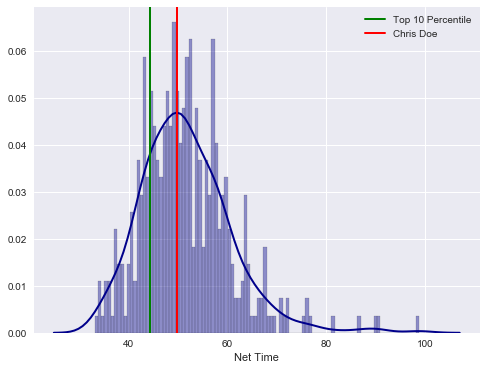

In [370]:
plt.figure(figsize=(8, 6))
DoeViz = sns.distplot(master_df[master_df.Division == '5'].Net_Time_Float, hist=True, kde=True,
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, axlabel='Net Time')
plt.axvline(44.314, 0,1, linewidth=2, color='g')
plt.axvline(49.72, 0,1, linewidth=2, color='r')
DoeViz.legend(labels=['Top 10 Percentile', 'Chris Doe'])

In [371]:
49.72 - 44.314

5.405999999999999

In [372]:
#Q4 - Compare the race results of each division.

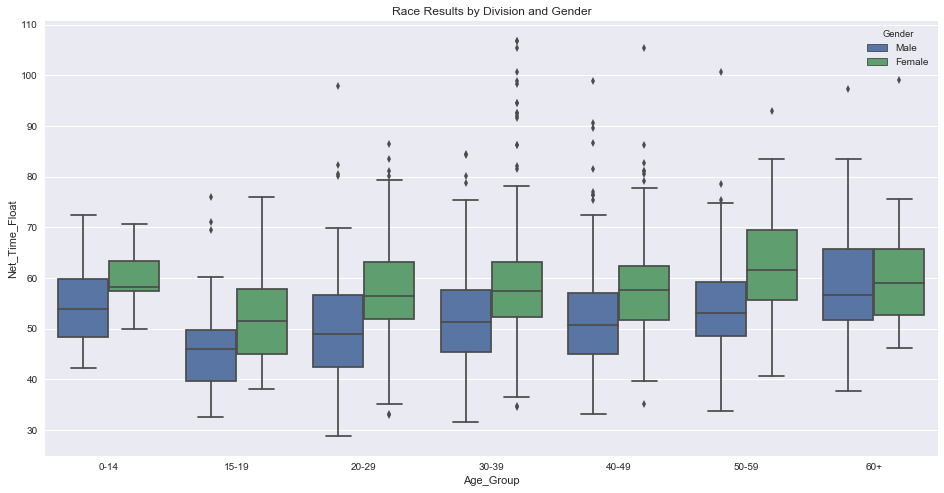

In [373]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(16, 8))
plt.title('Race Results by Division and Gender')
boxplot3 = sns.boxplot(data=master_df, x=master_df.Age_Group, y='Net_Time_Float', showfliers=True, hue = 'Gender', order=['0-14','15-19','20-29','30-39','40-49','50-59','60+'])